<a href="https://colab.research.google.com/github/tazwar70/IRIS-Dataset-Classification/blob/main/IRIS_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inintialize

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (10,8)

# Data Import

In [3]:
df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


# Data Visualization

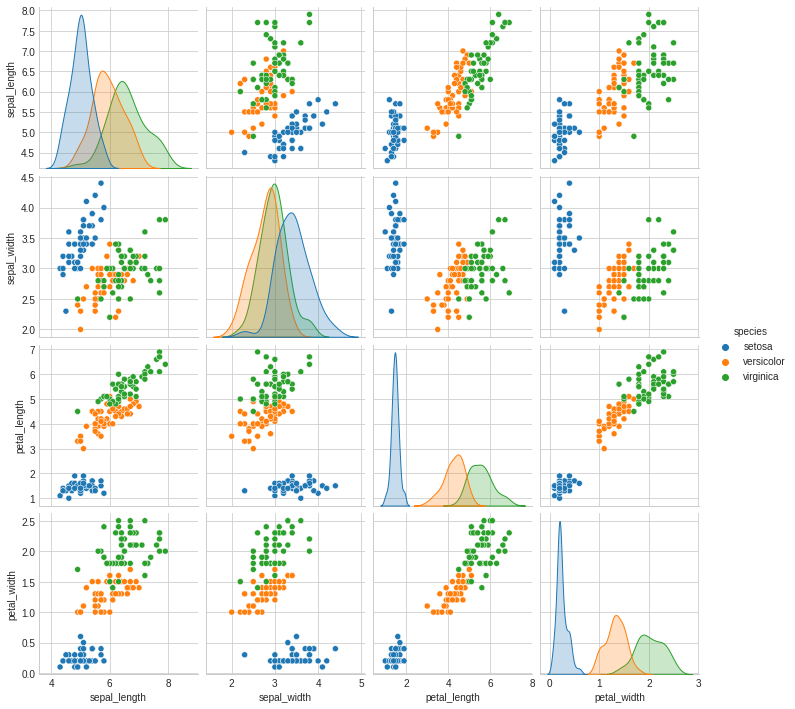

In [24]:
x = df.iloc[:,0:4]
y = df.iloc[:,4]
sns.pairplot(df, hue="species")

# Preparing the Model

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(
    x,
    y,
    test_size = 1/3
)

# Training the Model

In [32]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train, y_train)
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

# Testing the Model

In [38]:
y_pred = model.predict(x_test)
print(f'Predicted data: {y_pred[0:10]}\n')
print(f'Test data:\n{y_test[0:10]}')

Predicted data: ['versicolor' 'virginica' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'virginica' 'setosa' 'versicolor' 'virginica']

Test data:
52     versicolor
83     versicolor
6          setosa
57     versicolor
120     virginica
71     versicolor
105     virginica
13         setosa
68     versicolor
140     virginica
Name: species, dtype: object


# Evaluating the Model

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 16  1]
 [ 0  0 20]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        17
   virginica       0.95      1.00      0.98        20

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

